In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')

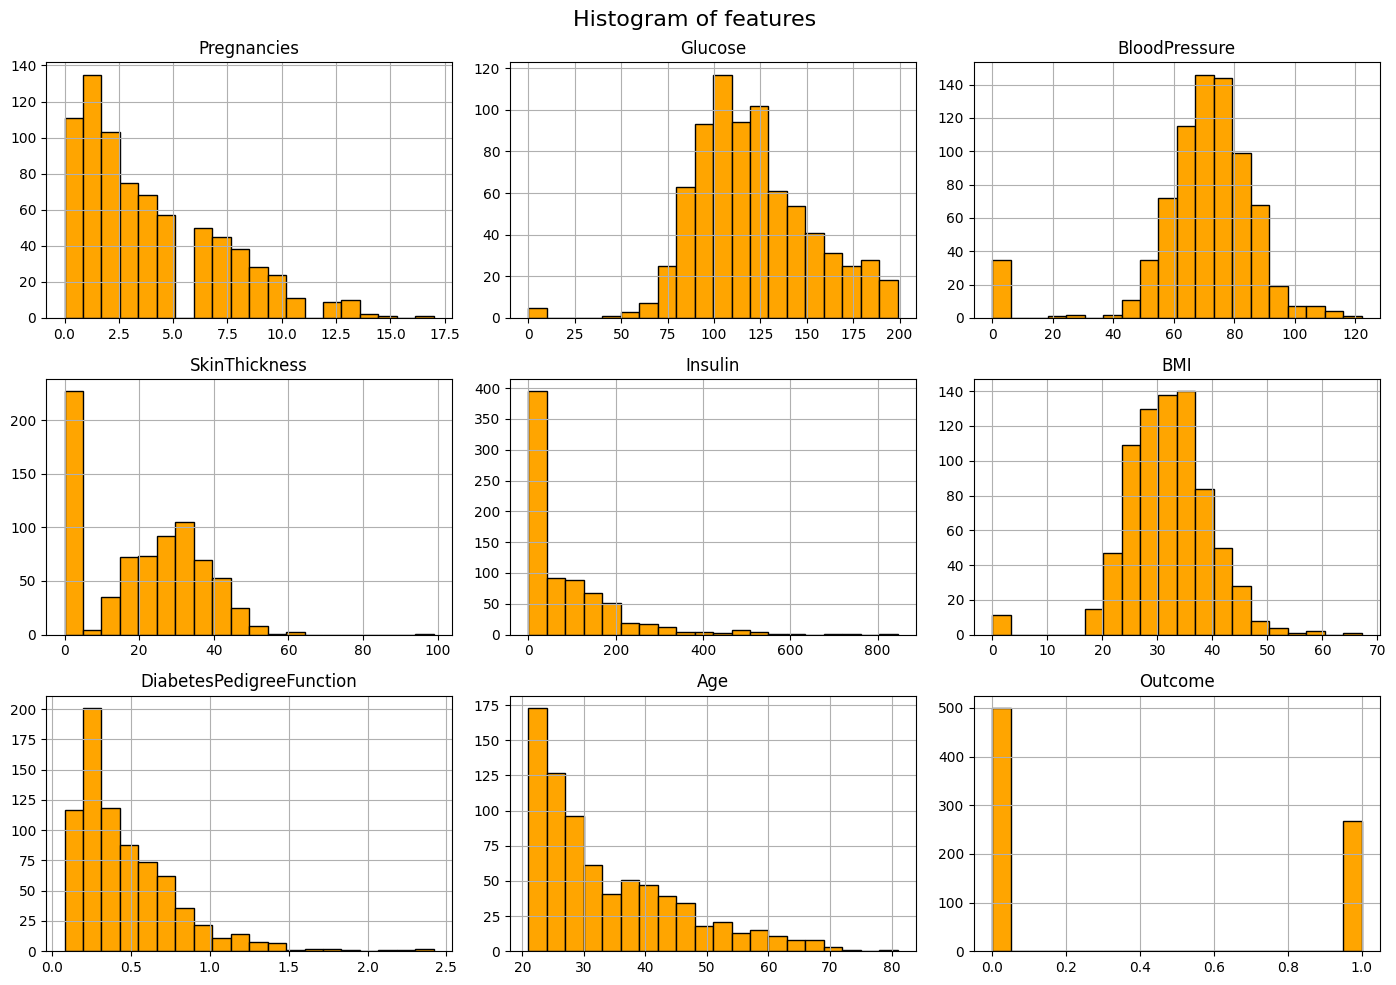

In [2]:
df.hist(figsize=(14,10), bins=20, color= 'orange',edgecolor= 'black')
plt.suptitle('Histogram of features', fontsize = 16)
plt.tight_layout()
plt.show()

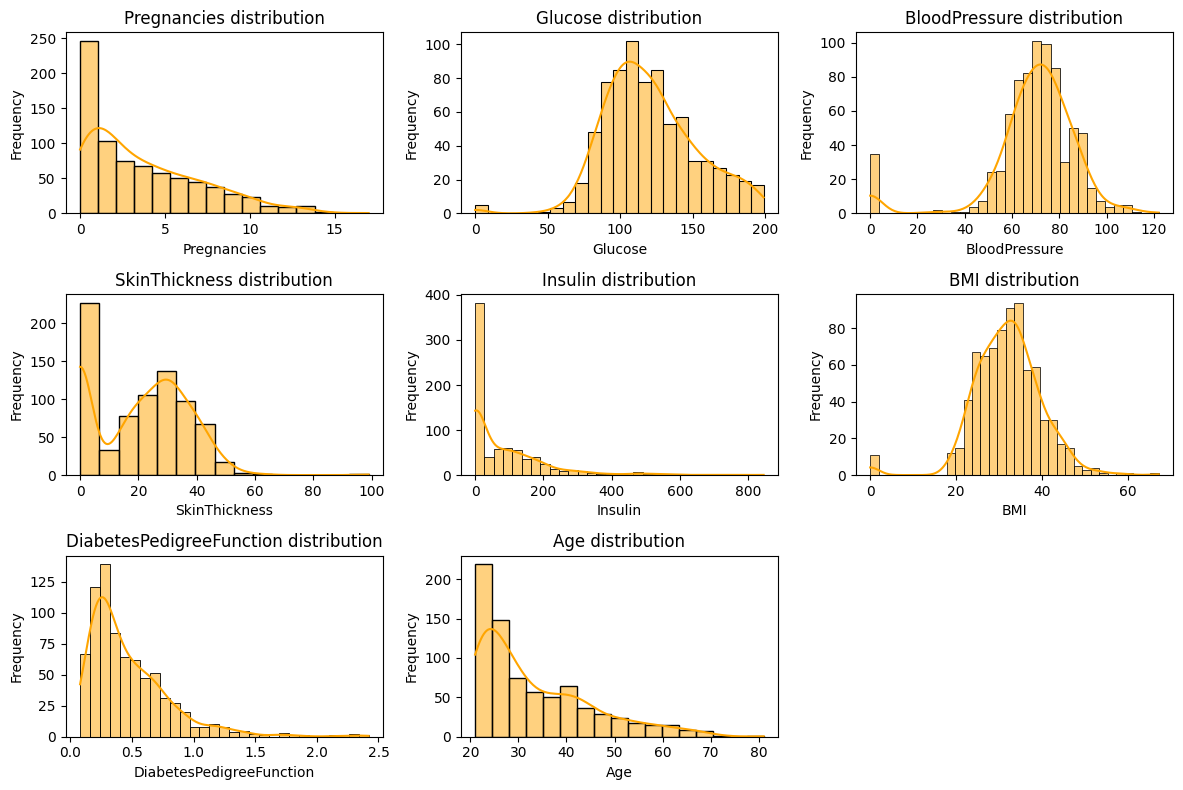

In [3]:
plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3,3,i)
    sns.histplot(data= df, x= col,kde= True,color= 'orange')
    plt.title(f'{col} distribution')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

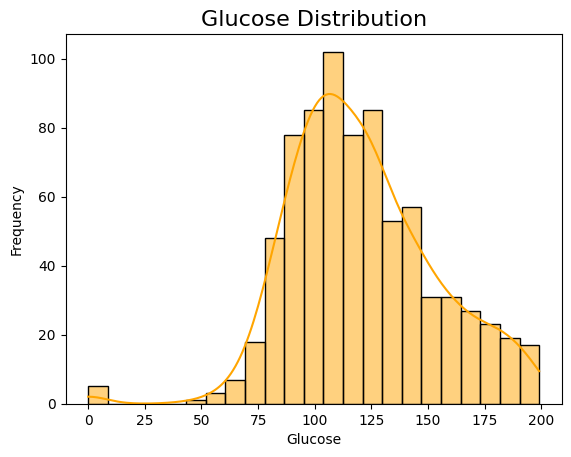

In [4]:
sns.histplot(data= df, x= 'Glucose',kde= True,color="orange")
plt.title('Glucose Distribution', fontsize= 16)
plt.ylabel('Frequency')
plt.tight_layout
plt.show()

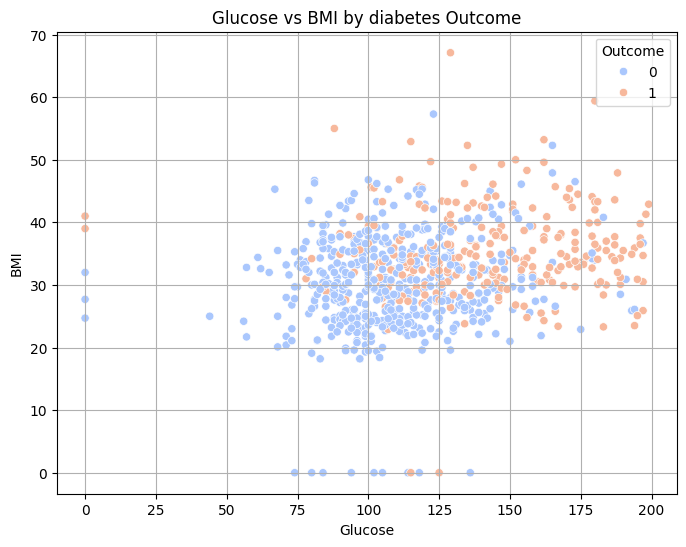

In [5]:
#scatter plot between Glucose and BMI colored by outcome
plt.figure(figsize= (8,6)) 
sns.scatterplot(data= df, x= 'Glucose',y='BMI',palette= 'coolwarm', hue= 'Outcome') 
plt.title('Glucose vs BMI by diabetes Outcome')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

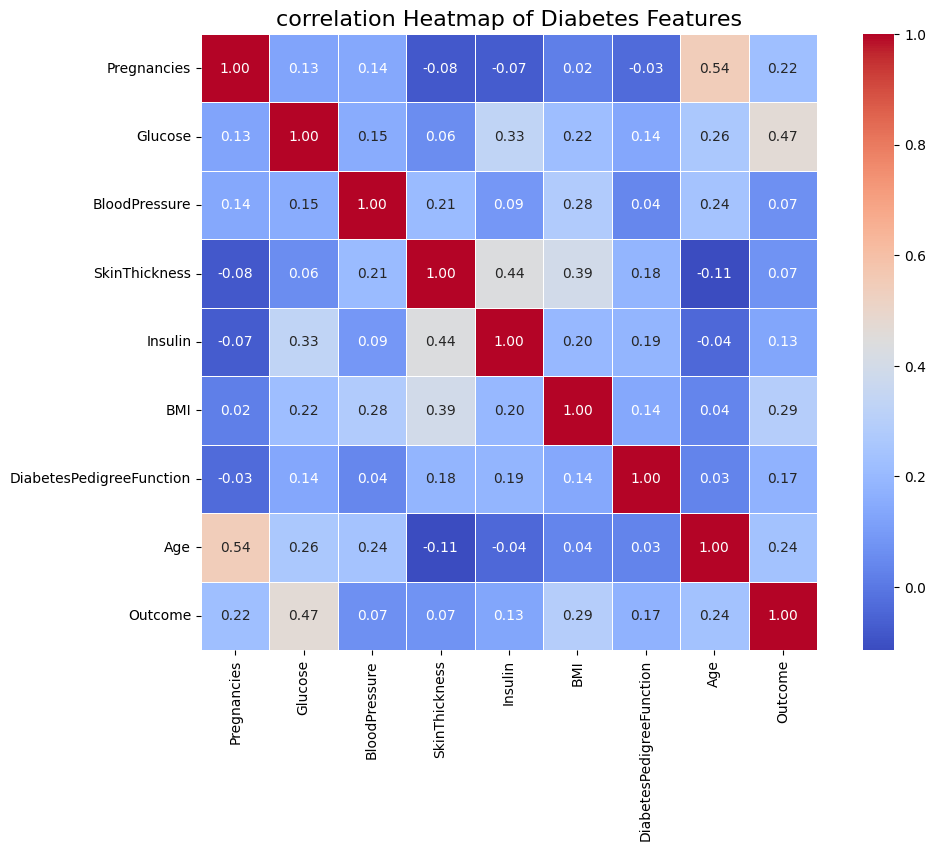

In [6]:
#correlation heatmap
#understand relationships between variables
#Detect multicollinearity(important before modelling)
#identify strong predictors of the target variables(outcome)

#compute correlation matrix: which measures linear relationships between numerical variables
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot= True, fmt= ".2f", square= True, cmap= 'coolwarm', linewidths= 0.5)
plt.title('correlation Heatmap of Diabetes Features', fontsize= 16)
plt.show()

In [7]:
corr_target = corr['Outcome'].drop('Outcome').sort_values(ascending= False)
print(corr_target)

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [8]:
#Identify features with invalid zero values
df.eq(0).sum()

#features where 0 is Not a valid value
invalid_zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#count zero values
df[invalid_zero_columns].eq(0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [9]:
#imputation strategy
#median is prefered over mean in medical data due to skewness and outliers
#Input Missing (Zero) values

#Replace 0 with NaN for specified columns
df[invalid_zero_columns] = df[invalid_zero_columns].replace(0,np.nan)

#impute missing values with median
for col in invalid_zero_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace= True)

C:\Users\Chinelo\AppData\Local\Temp\ipykernel_10564\604937256.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace= True)
C:\Users\Chinelo\AppData\Local\Temp\ipykernel_10564\604937256.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [10]:
df[invalid_zero_columns].isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [11]:
!pip install scikit-learn

In [12]:
!pip install flask

In [13]:
#select features to scale
#we'll exclude the target column outcome,and scale only the input features.
from sklearn.preprocessing import StandardScaler

#Seperate features and target
x = df.drop('Outcome', axis= 1)
y = df['Outcome']

#initialize scaler
scaler = StandardScaler()

#fit and transform the features
x_scaled = scaler.fit_transform(x)

#Now, all features have mean ~0 and std deviation ~1
x_scaled

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [14]:
x_scaled = pd.DataFrame(x_scaled,columns= df.columns[:-1])


In [15]:
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies']
x_scaled = x_scaled[selected_features]
x_scaled

,Glucose,BMI,Age,Pregnancies
0,0.866045,0.166619,1.425995,0.639947
1,-1.205066,-0.852200,-0.190672,-0.844885
2,2.016662,-1.332500,-0.105584,1.233880
3,-1.073567,-0.633881,-1.041549,-0.844885
4,0.504422,1.549303,-0.020496,-1.141852
...,...,...,...,...
763,-0.679069,0.064737,2.532136,1.827813
764,0.011301,0.632365,-0.531023,-0.547919
765,-0.021574,-0.910418,-0.275760,0.342981
766,0.142800,-0.342790,1.170732,-0.844885


In [16]:
#Train- Test split
from sklearn.model_selection import train_test_split

In [17]:
#selected features and target
x = x_scaled[['Glucose', 'BMI', 'Age', 'Pregnancies']]
y = y
x

,Glucose,BMI,Age,Pregnancies
0,0.866045,0.166619,1.425995,0.639947
1,-1.205066,-0.852200,-0.190672,-0.844885
2,2.016662,-1.332500,-0.105584,1.233880
3,-1.073567,-0.633881,-1.041549,-0.844885
4,0.504422,1.549303,-0.020496,-1.141852
...,...,...,...,...
763,-0.679069,0.064737,2.532136,1.827813
764,0.011301,0.632365,-0.531023,-0.547919
765,-0.021574,-0.910418,-0.275760,0.342981
766,0.142800,-0.342790,1.170732,-0.844885


In [18]:
#split: 80% train,20% test
x_train, x_test, y_train ,y_test = train_test_split(x,y, test_size=0.2, random_state= 42)
y_train.info()

<class 'pandas.core.series.Series'>
Index: 614 entries, 60 to 102
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 9.6 KB


In [19]:
#Train logistics Regression
from sklearn.linear_model import LogisticRegression

#initializen and train
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [20]:
#make predictions
#predict probabilities and classes

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]
y_prob

array([0.25579595, 0.20408247, 0.12102518, 0.13778241, 0.52933092,
       0.46030947, 0.01314177, 0.3108032 , 0.5686889 , 0.76928725,
       0.25109327, 0.91149284, 0.44595395, 0.22409957, 0.05327724,
       0.26901957, 0.13071534, 0.07517433, 0.7226239 , 0.5612476 ,
       0.21652358, 0.08541402, 0.49639655, 0.09757792, 0.58074501,
       0.88542952, 0.11172655, 0.03828635, 0.33732138, 0.11056647,
       0.88911809, 0.83757459, 0.84381381, 0.58512552, 0.56168284,
       0.66786378, 0.93905195, 0.20007758, 0.49111052, 0.51437214,
       0.06161694, 0.43642666, 0.49214117, 0.30295735, 0.04182998,
       0.5249423 , 0.48918661, 0.20323148, 0.26539077, 0.94371035,
       0.05039621, 0.66616177, 0.85188896, 0.22909116, 0.12940938,
       0.04170574, 0.7569194 , 0.06285423, 0.34223169, 0.75136749,
       0.70994581, 0.32685824, 0.289586  , 0.18511305, 0.10457551,
       0.62409964, 0.04331984, 0.81542701, 0.03587661, 0.82017547,
       0.69555194, 0.07883312, 0.16572417, 0.13982145, 0.09219

In [21]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [22]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0
0,0
1,0
2,0
3,0
4,1
...,...
149,1
150,0
151,0
152,0


In [23]:
y_prob

array([0.25579595, 0.20408247, 0.12102518, 0.13778241, 0.52933092,
       0.46030947, 0.01314177, 0.3108032 , 0.5686889 , 0.76928725,
       0.25109327, 0.91149284, 0.44595395, 0.22409957, 0.05327724,
       0.26901957, 0.13071534, 0.07517433, 0.7226239 , 0.5612476 ,
       0.21652358, 0.08541402, 0.49639655, 0.09757792, 0.58074501,
       0.88542952, 0.11172655, 0.03828635, 0.33732138, 0.11056647,
       0.88911809, 0.83757459, 0.84381381, 0.58512552, 0.56168284,
       0.66786378, 0.93905195, 0.20007758, 0.49111052, 0.51437214,
       0.06161694, 0.43642666, 0.49214117, 0.30295735, 0.04182998,
       0.5249423 , 0.48918661, 0.20323148, 0.26539077, 0.94371035,
       0.05039621, 0.66616177, 0.85188896, 0.22909116, 0.12940938,
       0.04170574, 0.7569194 , 0.06285423, 0.34223169, 0.75136749,
       0.70994581, 0.32685824, 0.289586  , 0.18511305, 0.10457551,
       0.62409964, 0.04331984, 0.81542701, 0.03587661, 0.82017547,
       0.69555194, 0.07883312, 0.16572417, 0.13982145, 0.09219

In [24]:
#Evaluate the Model
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nclassification Report:\n", classification_report(y_test,y_pred))

Accuracy: 0.7662337662337663
Precision: 0.6938775510204082
Recall: 0.6181818181818182
F1 Score: 0.6538461538461539

classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



In [25]:
#EVALUATE THE MODEL

In [26]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [27]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [28]:
import joblib
import streamlit as st
import numpy as np

In [29]:
#Scale Selected Features to deploy
new_scaler = StandardScaler()
x_selected_features = df[['Glucose', 'BMI', 'Age', 'Pregnancies']]

#x_selected_features
y_new = df['Outcome']

x_scaled_selected_features = new_scaler.fit_transform(x_selected_features)
x_scaled_selected_features

array([[ 0.86604475,  0.16661938,  1.4259954 ,  0.63994726],
       [-1.20506583, -0.85219976, -0.19067191, -0.84488505],
       [ 2.01666174, -1.33250021, -0.10558415,  1.23388019],
       ...,
       [-0.02157407, -0.910418  , -0.27575966,  0.3429808 ],
       [ 0.14279979, -0.34279019,  1.17073215, -0.84488505],
       [-0.94206766, -0.29912651, -0.87137393, -0.84488505]],
      shape=(768, 4))

In [30]:
x_scaled_selected_features_df = pd.DataFrame(x_scaled_selected_features,columns=['Glucose','BMI', 'Agw', 'Pregnancies'])
x_scaled_selected_features_df

,Glucose,BMI,Agw,Pregnancies
0,0.866045,0.166619,1.425995,0.639947
1,-1.205066,-0.852200,-0.190672,-0.844885
2,2.016662,-1.332500,-0.105584,1.233880
3,-1.073567,-0.633881,-1.041549,-0.844885
4,0.504422,1.549303,-0.020496,-1.141852
...,...,...,...,...
763,-0.679069,0.064737,2.532136,1.827813
764,0.011301,0.632365,-0.531023,-0.547919
765,-0.021574,-0.910418,-0.275760,0.342981
766,0.142800,-0.342790,1.170732,-0.844885


In [31]:
y_new

x_new = x_scaled_selected_features_df
x_new

,Glucose,BMI,Agw,Pregnancies
0,0.866045,0.166619,1.425995,0.639947
1,-1.205066,-0.852200,-0.190672,-0.844885
2,2.016662,-1.332500,-0.105584,1.233880
3,-1.073567,-0.633881,-1.041549,-0.844885
4,0.504422,1.549303,-0.020496,-1.141852
...,...,...,...,...
763,-0.679069,0.064737,2.532136,1.827813
764,0.011301,0.632365,-0.531023,-0.547919
765,-0.021574,-0.910418,-0.275760,0.342981
766,0.142800,-0.342790,1.170732,-0.844885


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new,test_size= 0.2, random_state= 42)

In [34]:
from sklearn.linear_model import LogisticRegression

new_model = LogisticRegression()

#initialize and train the model
new_model.fit(x_new_train,y_new_train)

LogisticRegression()

In [35]:
#Make prediction 
#predict classes
new_y_pred = new_model.predict(x_new_test)

#predict probability
new_y_prob = new_model.predict_proba(x_new_test)[:,1]


In [37]:
#save the trained model
joblib.dump(new_model,'new_diabetes_model.pkl')

#Save the scaled value
joblib.dump(new_scaler,  'new_scaler.pkl')

['new_scaler.pkl']